In [28]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys as KEY
import pandas as pd
import time
import tqdm
# def document_initialised(driver):
#     return driver.execute_script("return initialised")
def setup_driver(url):

    driver = webdriver.Chrome()
    time.sleep(3)
    # WebDriverWait(driver, timeout=30).until(document_initialised)
    driver.get(url)
    time.sleep(3)
    # WebDriverWait(driver, timeout=30).until(document_initialised)
    return driver

def find_element(driver):
    drop_amount = driver.find_element(By.ID, "buffonDropAmountBox")
    drop_buttom = driver.find_element(By.ID, "buffonDropAmount")
    needle_scale_input = driver.find_element(By.ID, "buffonScaleBox")
    start_over_button = driver.find_element(By.ID, "buffonReset")
    return drop_amount, drop_buttom, needle_scale_input, start_over_button

def set_params(drop_amount, needle_scale_input, drop_num, needle_scale):
    drop_amount.clear()
    time.sleep(0.3)
    drop_amount.send_keys(str(drop_num))
    time.sleep(0.3)
    # needle_scale_input.clear()
    needle_scale_input.send_keys(KEY.BACKSPACE * 10) 
    time.sleep(0.3)
    needle_scale_input.send_keys(str(needle_scale))
    print(needle_scale)
    time.sleep(0.3)
    # needle_scale_input.setAttribute("value", str(needle_scale))
    return

def get_result(driver):
    needle_scale = driver.find_element(By.ID, "buffonNumScale").text
    extent = driver.find_element(By.ID, "buffonNumExtent").text
    number_of_drops = driver.find_element(By.ID, "buffonNumDrops").text
    number_of_hits = driver.find_element(By.ID, "buffonNumHits").text
    drops_per_hits = driver.find_element(By.ID, "buffonNumRatio").text
    pi = driver.find_element(By.ID, "buffonNumPi").text
    return float(needle_scale), float(extent), int(number_of_drops), int(number_of_hits), float(drops_per_hits), float(pi)

def drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom):
    set_params(drop_amount, needle_scale_input, drop_num, needle_scale)
    drop_buttom.submit()
    #!
    time.sleep(drop_num * 0.00005 if drop_num * 0.00005 > 0.5 else 0.5)
    needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = get_result(driver)
    return needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi

def create_df():
    df = pd.DataFrame(columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    return df

def add_data(df, needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi):
    new_row = pd.DataFrame([[needle_scale, extent, number_of_drops, number_of_hits, drops_per_hits, pi]],
                            columns=['needle_scale', 'extent', 'number_of_drops', 'number_of_hits', 'drops_per_hits', 'pi'])
    df = pd.concat([df, new_row], ignore_index=True)
    return df

def start_simulate(needle_scale, drop_num, simulate_times, dir_path):
    

    url = "https://mste.illinois.edu/activity/buffon/"
    driver = setup_driver(url)
    drop_amount, drop_buttom, needle_scale_input, start_over_button = find_element(driver)

    df = create_df()
    # drop_amount_list = [100, 1000, 10000, 100000]#, 1000000]
    # needle_scale_list = [0.5]#, 1
    # simulate_times = 10

    # for drop_num in drop_amount_list:
    #     for needle_scale in needle_scale_list:
    for _ in tqdm.trange(simulate_times):
        start_over_button.submit()
        time.sleep(0.3)
        needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi = drop_simulate(driver, drop_amount, drop_num, needle_scale_input, needle_scale, drop_buttom)
        df = add_data(df, needle_scale_output, extent, number_of_drops, number_of_hits, drops_per_hits, pi)


    df.to_csv(f'{dir_path}/drop{drop_num}_scale{needle_scale}_times{simulate_times}.csv', index=False)
    return df

In [30]:
for needle_scale in [0.5, 1, 0.1]:
    for drop_num in [30, 100, 1000, 10000]:
        for simulate_times in [100]:
            df = start_simulate(needle_scale, drop_num, simulate_times, dir_path='./buffon_needle_data')

  0%|          | 0/100 [00:00<?, ?it/s]

0.5


  1%|          | 1/100 [00:02<03:48,  2.31s/it]

0.5


  2%|▏         | 2/100 [00:04<03:37,  2.22s/it]

0.5


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.5


  4%|▍         | 4/100 [00:08<03:28,  2.17s/it]

0.5


  5%|▌         | 5/100 [00:10<03:26,  2.17s/it]

0.5


  6%|▌         | 6/100 [00:13<03:23,  2.16s/it]

0.5


  7%|▋         | 7/100 [00:15<03:21,  2.16s/it]

0.5


  8%|▊         | 8/100 [00:17<03:19,  2.16s/it]

0.5


  9%|▉         | 9/100 [00:19<03:16,  2.16s/it]

0.5


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.5


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.5


 12%|█▏        | 12/100 [00:26<03:10,  2.17s/it]

0.5


 13%|█▎        | 13/100 [00:28<03:08,  2.16s/it]

0.5


 14%|█▍        | 14/100 [00:30<03:05,  2.16s/it]

0.5


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.5


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

0.5


 17%|█▋        | 17/100 [00:36<02:59,  2.16s/it]

0.5


 18%|█▊        | 18/100 [00:39<02:57,  2.16s/it]

0.5


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

0.5


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.5


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

0.5


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

0.5


 23%|██▎       | 23/100 [00:49<02:46,  2.16s/it]

0.5


 24%|██▍       | 24/100 [00:51<02:43,  2.16s/it]

0.5


 25%|██▌       | 25/100 [00:54<02:41,  2.15s/it]

0.5


 26%|██▌       | 26/100 [00:56<02:38,  2.15s/it]

0.5


 27%|██▋       | 27/100 [00:58<02:36,  2.15s/it]

0.5


 28%|██▊       | 28/100 [01:00<02:35,  2.15s/it]

0.5


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

0.5


 30%|███       | 30/100 [01:04<02:31,  2.16s/it]

0.5


 31%|███       | 31/100 [01:07<02:28,  2.16s/it]

0.5


 32%|███▏      | 32/100 [01:09<02:26,  2.16s/it]

0.5


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

0.5


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

0.5


 35%|███▌      | 35/100 [01:15<02:20,  2.16s/it]

0.5


 36%|███▌      | 36/100 [01:17<02:18,  2.16s/it]

0.5


 37%|███▋      | 37/100 [01:20<02:16,  2.16s/it]

0.5


 38%|███▊      | 38/100 [01:22<02:13,  2.16s/it]

0.5


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.5


 40%|████      | 40/100 [01:26<02:09,  2.16s/it]

0.5


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

0.5


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

0.5


 43%|████▎     | 43/100 [01:32<02:02,  2.16s/it]

0.5


 44%|████▍     | 44/100 [01:35<02:00,  2.15s/it]

0.5


 45%|████▌     | 45/100 [01:37<01:58,  2.15s/it]

0.5


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

0.5


 47%|████▋     | 47/100 [01:41<01:54,  2.16s/it]

0.5


 48%|████▊     | 48/100 [01:43<01:52,  2.15s/it]

0.5


 49%|████▉     | 49/100 [01:45<01:49,  2.16s/it]

0.5


 50%|█████     | 50/100 [01:48<01:47,  2.16s/it]

0.5


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

0.5


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

0.5


 53%|█████▎    | 53/100 [01:54<01:41,  2.15s/it]

0.5


 54%|█████▍    | 54/100 [01:56<01:39,  2.15s/it]

0.5


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

0.5


 56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

0.5


 57%|█████▋    | 57/100 [02:03<01:32,  2.15s/it]

0.5


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

0.5


 59%|█████▉    | 59/100 [02:07<01:28,  2.16s/it]

0.5


 60%|██████    | 60/100 [02:09<01:26,  2.16s/it]

0.5


 61%|██████    | 61/100 [02:11<01:24,  2.16s/it]

0.5


 62%|██████▏   | 62/100 [02:13<01:22,  2.16s/it]

0.5


 63%|██████▎   | 63/100 [02:16<01:20,  2.17s/it]

0.5


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

0.5


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

0.5


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.5


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

0.5


 68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

0.5


 69%|██████▉   | 69/100 [02:29<01:06,  2.16s/it]

0.5


 70%|███████   | 70/100 [02:31<01:04,  2.16s/it]

0.5


 71%|███████   | 71/100 [02:33<01:02,  2.16s/it]

0.5


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

0.5


 73%|███████▎  | 73/100 [02:37<00:58,  2.16s/it]

0.5


 74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

0.5


 75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

0.5


 76%|███████▌  | 76/100 [02:44<00:51,  2.15s/it]

0.5


 77%|███████▋  | 77/100 [02:46<00:49,  2.15s/it]

0.5


 78%|███████▊  | 78/100 [02:48<00:47,  2.15s/it]

0.5


 79%|███████▉  | 79/100 [02:50<00:45,  2.16s/it]

0.5


 80%|████████  | 80/100 [02:52<00:43,  2.15s/it]

0.5


 81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

0.5


 82%|████████▏ | 82/100 [02:57<00:38,  2.15s/it]

0.5


 83%|████████▎ | 83/100 [02:59<00:36,  2.15s/it]

0.5


 84%|████████▍ | 84/100 [03:01<00:34,  2.15s/it]

0.5


 85%|████████▌ | 85/100 [03:03<00:32,  2.15s/it]

0.5


 86%|████████▌ | 86/100 [03:05<00:30,  2.15s/it]

0.5


 87%|████████▋ | 87/100 [03:07<00:27,  2.15s/it]

0.5


 88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

0.5


 89%|████████▉ | 89/100 [03:12<00:23,  2.15s/it]

0.5


 90%|█████████ | 90/100 [03:14<00:21,  2.16s/it]

0.5


 91%|█████████ | 91/100 [03:16<00:19,  2.15s/it]

0.5


 92%|█████████▏| 92/100 [03:18<00:17,  2.16s/it]

0.5


 93%|█████████▎| 93/100 [03:20<00:15,  2.15s/it]

0.5


 94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

0.5


 95%|█████████▌| 95/100 [03:25<00:10,  2.15s/it]

0.5


 96%|█████████▌| 96/100 [03:27<00:08,  2.15s/it]

0.5


 97%|█████████▋| 97/100 [03:29<00:06,  2.15s/it]

0.5


 98%|█████████▊| 98/100 [03:31<00:04,  2.15s/it]

0.5


 99%|█████████▉| 99/100 [03:33<00:02,  2.15s/it]

0.5


  0%|          | 0/100 [00:00<?, ?it/s]

0.5


  1%|          | 1/100 [00:02<03:48,  2.31s/it]

0.5


  2%|▏         | 2/100 [00:04<03:37,  2.22s/it]

0.5


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.5


  4%|▍         | 4/100 [00:08<03:29,  2.18s/it]

0.5


  5%|▌         | 5/100 [00:10<03:26,  2.17s/it]

0.5


  6%|▌         | 6/100 [00:13<03:23,  2.16s/it]

0.5


  7%|▋         | 7/100 [00:15<03:21,  2.16s/it]

0.5


  8%|▊         | 8/100 [00:17<03:18,  2.16s/it]

0.5


  9%|▉         | 9/100 [00:19<03:16,  2.16s/it]

0.5


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.5


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.5


 12%|█▏        | 12/100 [00:26<03:09,  2.16s/it]

0.5


 13%|█▎        | 13/100 [00:28<03:07,  2.16s/it]

0.5


 14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

0.5


 15%|█▌        | 15/100 [00:32<03:03,  2.15s/it]

0.5


 16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

0.5


 17%|█▋        | 17/100 [00:36<02:58,  2.16s/it]

0.5


 18%|█▊        | 18/100 [00:38<02:56,  2.16s/it]

0.5


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

0.5


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.5


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

0.5


 22%|██▏       | 22/100 [00:47<02:49,  2.17s/it]

0.5


 23%|██▎       | 23/100 [00:49<02:46,  2.16s/it]

0.5


 24%|██▍       | 24/100 [00:51<02:44,  2.16s/it]

0.5


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

0.5


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.5


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

0.5


 28%|██▊       | 28/100 [01:00<02:35,  2.16s/it]

0.5


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

0.5


 30%|███       | 30/100 [01:04<02:30,  2.15s/it]

0.5


 31%|███       | 31/100 [01:07<02:28,  2.16s/it]

0.5


 32%|███▏      | 32/100 [01:09<02:26,  2.15s/it]

0.5


 33%|███▎      | 33/100 [01:11<02:23,  2.15s/it]

0.5


 34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

0.5


 35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

0.5


 36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

0.5


 37%|███▋      | 37/100 [01:19<02:15,  2.15s/it]

0.5


 38%|███▊      | 38/100 [01:22<02:13,  2.15s/it]

0.5


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.5


 40%|████      | 40/100 [01:26<02:09,  2.16s/it]

0.5


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

0.5


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

0.5


 43%|████▎     | 43/100 [01:32<02:03,  2.16s/it]

0.5


 44%|████▍     | 44/100 [01:35<02:00,  2.16s/it]

0.5


 45%|████▌     | 45/100 [01:37<01:58,  2.16s/it]

0.5


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

0.5


 47%|████▋     | 47/100 [01:41<01:54,  2.16s/it]

0.5


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.5


 49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

0.5


 50%|█████     | 50/100 [01:47<01:47,  2.16s/it]

0.5


 51%|█████     | 51/100 [01:50<01:45,  2.15s/it]

0.5


 52%|█████▏    | 52/100 [01:52<01:43,  2.15s/it]

0.5


 53%|█████▎    | 53/100 [01:54<01:40,  2.15s/it]

0.5


 54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

0.5


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

0.5


 56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

0.5


 57%|█████▋    | 57/100 [02:03<01:32,  2.15s/it]

0.5


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

0.5


 59%|█████▉    | 59/100 [02:07<01:28,  2.15s/it]

0.5


 60%|██████    | 60/100 [02:09<01:26,  2.15s/it]

0.5


 61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

0.5


 62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

0.5


 63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

0.5


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

0.5


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

0.5


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.5


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

0.5


 68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

0.5


 69%|██████▉   | 69/100 [02:28<01:06,  2.16s/it]

0.5


 70%|███████   | 70/100 [02:31<01:04,  2.16s/it]

0.5


 71%|███████   | 71/100 [02:33<01:02,  2.16s/it]

0.5


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

0.5


 73%|███████▎  | 73/100 [02:37<00:58,  2.15s/it]

0.5


 74%|███████▍  | 74/100 [02:39<00:56,  2.15s/it]

0.5


 75%|███████▌  | 75/100 [02:41<00:53,  2.16s/it]

0.5


 76%|███████▌  | 76/100 [02:43<00:51,  2.16s/it]

0.5


 77%|███████▋  | 77/100 [02:46<00:49,  2.16s/it]

0.5


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

0.5


 79%|███████▉  | 79/100 [02:50<00:45,  2.15s/it]

0.5


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

0.5


 81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

0.5


 82%|████████▏ | 82/100 [02:56<00:38,  2.16s/it]

0.5


 83%|████████▎ | 83/100 [02:59<00:36,  2.16s/it]

0.5


 84%|████████▍ | 84/100 [03:01<00:34,  2.16s/it]

0.5


 85%|████████▌ | 85/100 [03:03<00:32,  2.16s/it]

0.5


 86%|████████▌ | 86/100 [03:05<00:30,  2.16s/it]

0.5


 87%|████████▋ | 87/100 [03:07<00:28,  2.16s/it]

0.5


 88%|████████▊ | 88/100 [03:09<00:25,  2.16s/it]

0.5


 89%|████████▉ | 89/100 [03:12<00:23,  2.17s/it]

0.5


 90%|█████████ | 90/100 [03:14<00:21,  2.16s/it]

0.5


 91%|█████████ | 91/100 [03:16<00:19,  2.16s/it]

0.5


 92%|█████████▏| 92/100 [03:18<00:17,  2.16s/it]

0.5


 93%|█████████▎| 93/100 [03:20<00:15,  2.16s/it]

0.5


 94%|█████████▍| 94/100 [03:22<00:12,  2.16s/it]

0.5


 95%|█████████▌| 95/100 [03:25<00:10,  2.16s/it]

0.5


 96%|█████████▌| 96/100 [03:27<00:08,  2.16s/it]

0.5


 97%|█████████▋| 97/100 [03:29<00:06,  2.16s/it]

0.5


 98%|█████████▊| 98/100 [03:31<00:04,  2.16s/it]

0.5


 99%|█████████▉| 99/100 [03:33<00:02,  2.16s/it]

0.5


  0%|          | 0/100 [00:00<?, ?it/s]

0.5


  1%|          | 1/100 [00:02<03:48,  2.31s/it]

0.5


  2%|▏         | 2/100 [00:04<03:38,  2.23s/it]

0.5


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.5


  4%|▍         | 4/100 [00:08<03:28,  2.17s/it]

0.5


  5%|▌         | 5/100 [00:10<03:25,  2.16s/it]

0.5


  6%|▌         | 6/100 [00:13<03:23,  2.17s/it]

0.5


  7%|▋         | 7/100 [00:15<03:21,  2.17s/it]

0.5


  8%|▊         | 8/100 [00:17<03:19,  2.17s/it]

0.5


  9%|▉         | 9/100 [00:19<03:17,  2.17s/it]

0.5


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.5


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.5


 12%|█▏        | 12/100 [00:26<03:10,  2.16s/it]

0.5


 13%|█▎        | 13/100 [00:28<03:08,  2.17s/it]

0.5


 14%|█▍        | 14/100 [00:30<03:06,  2.17s/it]

0.5


 15%|█▌        | 15/100 [00:32<03:04,  2.17s/it]

0.5


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

0.5


 17%|█▋        | 17/100 [00:36<02:59,  2.16s/it]

0.5


 18%|█▊        | 18/100 [00:39<02:57,  2.16s/it]

0.5


 19%|█▉        | 19/100 [00:41<02:55,  2.16s/it]

0.5


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.5


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

0.5


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

0.5


 23%|██▎       | 23/100 [00:49<02:46,  2.16s/it]

0.5


 24%|██▍       | 24/100 [00:52<02:43,  2.16s/it]

0.5


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

0.5


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.5


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

0.5


 28%|██▊       | 28/100 [01:00<02:35,  2.16s/it]

0.5


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

0.5


 30%|███       | 30/100 [01:04<02:31,  2.16s/it]

0.5


 31%|███       | 31/100 [01:07<02:28,  2.16s/it]

0.5


 32%|███▏      | 32/100 [01:09<02:26,  2.16s/it]

0.5


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

0.5


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

0.5


 35%|███▌      | 35/100 [01:15<02:20,  2.16s/it]

0.5


 36%|███▌      | 36/100 [01:17<02:18,  2.16s/it]

0.5


 37%|███▋      | 37/100 [01:20<02:15,  2.16s/it]

0.5


 38%|███▊      | 38/100 [01:22<02:13,  2.16s/it]

0.5


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.5


 40%|████      | 40/100 [01:26<02:09,  2.15s/it]

0.5


 41%|████      | 41/100 [01:28<02:06,  2.15s/it]

0.5


 42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

0.5


 43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

0.5


 44%|████▍     | 44/100 [01:35<02:00,  2.15s/it]

0.5


 45%|████▌     | 45/100 [01:37<01:58,  2.15s/it]

0.5


 46%|████▌     | 46/100 [01:39<01:56,  2.15s/it]

0.5


 47%|████▋     | 47/100 [01:41<01:54,  2.15s/it]

0.5


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.5


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

0.5


 50%|█████     | 50/100 [01:48<01:48,  2.16s/it]

0.5


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

0.5


 52%|█████▏    | 52/100 [01:52<01:43,  2.15s/it]

0.5


 53%|█████▎    | 53/100 [01:54<01:41,  2.15s/it]

0.5


 54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

0.5


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

0.5


 56%|█████▌    | 56/100 [02:01<01:34,  2.16s/it]

0.5


 57%|█████▋    | 57/100 [02:03<01:32,  2.16s/it]

0.5


 58%|█████▊    | 58/100 [02:05<01:30,  2.16s/it]

0.5


 59%|█████▉    | 59/100 [02:07<01:28,  2.16s/it]

0.5


 60%|██████    | 60/100 [02:09<01:26,  2.16s/it]

0.5


 61%|██████    | 61/100 [02:11<01:24,  2.16s/it]

0.5


 62%|██████▏   | 62/100 [02:13<01:22,  2.16s/it]

0.5


 63%|██████▎   | 63/100 [02:16<01:19,  2.16s/it]

0.5


 64%|██████▍   | 64/100 [02:18<01:17,  2.15s/it]

0.5


 65%|██████▌   | 65/100 [02:20<01:15,  2.15s/it]

0.5


 66%|██████▌   | 66/100 [02:22<01:13,  2.15s/it]

0.5


 67%|██████▋   | 67/100 [02:24<01:10,  2.15s/it]

0.5


 68%|██████▊   | 68/100 [02:26<01:08,  2.15s/it]

0.5


 69%|██████▉   | 69/100 [02:29<01:06,  2.15s/it]

0.5


 70%|███████   | 70/100 [02:31<01:04,  2.15s/it]

0.5


 71%|███████   | 71/100 [02:33<01:02,  2.15s/it]

0.5


 72%|███████▏  | 72/100 [02:35<01:00,  2.15s/it]

0.5


 73%|███████▎  | 73/100 [02:37<00:58,  2.15s/it]

0.5


 74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

0.5


 75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

0.5


 76%|███████▌  | 76/100 [02:44<00:51,  2.15s/it]

0.5


 77%|███████▋  | 77/100 [02:46<00:49,  2.15s/it]

0.5


 78%|███████▊  | 78/100 [02:48<00:47,  2.15s/it]

0.5


 79%|███████▉  | 79/100 [02:50<00:45,  2.15s/it]

0.5


 80%|████████  | 80/100 [02:52<00:42,  2.15s/it]

0.5


 81%|████████  | 81/100 [02:54<00:40,  2.16s/it]

0.5


 82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

0.5


 83%|████████▎ | 83/100 [02:59<00:36,  2.15s/it]

0.5


 84%|████████▍ | 84/100 [03:01<00:34,  2.15s/it]

0.5


 85%|████████▌ | 85/100 [03:03<00:32,  2.16s/it]

0.5


 86%|████████▌ | 86/100 [03:05<00:30,  2.16s/it]

0.5


 87%|████████▋ | 87/100 [03:07<00:28,  2.16s/it]

0.5


 88%|████████▊ | 88/100 [03:09<00:25,  2.16s/it]

0.5


 89%|████████▉ | 89/100 [03:12<00:23,  2.16s/it]

0.5


 90%|█████████ | 90/100 [03:14<00:21,  2.16s/it]

0.5


 91%|█████████ | 91/100 [03:16<00:19,  2.16s/it]

0.5


 92%|█████████▏| 92/100 [03:18<00:17,  2.15s/it]

0.5


 93%|█████████▎| 93/100 [03:20<00:15,  2.15s/it]

0.5


 94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

0.5


 95%|█████████▌| 95/100 [03:24<00:10,  2.14s/it]

0.5


 96%|█████████▌| 96/100 [03:27<00:08,  2.14s/it]

0.5


 97%|█████████▋| 97/100 [03:29<00:06,  2.14s/it]

0.5


 98%|█████████▊| 98/100 [03:31<00:04,  2.14s/it]

0.5


 99%|█████████▉| 99/100 [03:33<00:02,  2.14s/it]

0.5


  0%|          | 0/100 [00:00<?, ?it/s]

0.5


  1%|          | 1/100 [00:02<03:49,  2.32s/it]

0.5


  2%|▏         | 2/100 [00:04<03:38,  2.23s/it]

0.5


  3%|▎         | 3/100 [00:06<03:33,  2.20s/it]

0.5


  4%|▍         | 4/100 [00:08<03:30,  2.19s/it]

0.5


  5%|▌         | 5/100 [00:10<03:27,  2.18s/it]

0.5


  6%|▌         | 6/100 [00:13<03:24,  2.17s/it]

0.5


  7%|▋         | 7/100 [00:15<03:21,  2.17s/it]

0.5


  8%|▊         | 8/100 [00:17<03:19,  2.17s/it]

0.5


  9%|▉         | 9/100 [00:19<03:17,  2.17s/it]

0.5


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.5


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.5


 12%|█▏        | 12/100 [00:26<03:10,  2.16s/it]

0.5


 13%|█▎        | 13/100 [00:28<03:08,  2.16s/it]

0.5


 14%|█▍        | 14/100 [00:30<03:06,  2.17s/it]

0.5


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.5


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

0.5


 17%|█▋        | 17/100 [00:36<02:58,  2.16s/it]

0.5


 18%|█▊        | 18/100 [00:39<02:56,  2.15s/it]

0.5


 19%|█▉        | 19/100 [00:41<02:54,  2.15s/it]

0.5


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.5


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

0.5


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

0.5


 23%|██▎       | 23/100 [00:49<02:46,  2.16s/it]

0.5


 24%|██▍       | 24/100 [00:52<02:43,  2.16s/it]

0.5


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

0.5


 26%|██▌       | 26/100 [00:56<02:39,  2.15s/it]

0.5


 27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

0.5


 28%|██▊       | 28/100 [01:00<02:35,  2.15s/it]

0.5


 29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

0.5


 30%|███       | 30/100 [01:04<02:30,  2.16s/it]

0.5


 31%|███       | 31/100 [01:07<02:28,  2.16s/it]

0.5


 32%|███▏      | 32/100 [01:09<02:26,  2.15s/it]

0.5


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

0.5


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

0.5


 35%|███▌      | 35/100 [01:15<02:20,  2.16s/it]

0.5


 36%|███▌      | 36/100 [01:17<02:17,  2.16s/it]

0.5


 37%|███▋      | 37/100 [01:20<02:16,  2.16s/it]

0.5


 38%|███▊      | 38/100 [01:22<02:14,  2.16s/it]

0.5


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.5


 40%|████      | 40/100 [01:26<02:09,  2.16s/it]

0.5


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

0.5


 42%|████▏     | 42/100 [01:30<02:04,  2.15s/it]

0.5


 43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

0.5


 44%|████▍     | 44/100 [01:35<02:00,  2.15s/it]

0.5


 45%|████▌     | 45/100 [01:37<01:58,  2.15s/it]

0.5


 46%|████▌     | 46/100 [01:39<01:56,  2.15s/it]

0.5


 47%|████▋     | 47/100 [01:41<01:54,  2.16s/it]

0.5


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.5


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

0.5


 50%|█████     | 50/100 [01:48<01:47,  2.16s/it]

0.5


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

0.5


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

0.5


 53%|█████▎    | 53/100 [01:54<01:41,  2.17s/it]

0.5


 54%|█████▍    | 54/100 [01:56<01:39,  2.17s/it]

0.5


 55%|█████▌    | 55/100 [01:58<01:37,  2.16s/it]

0.5


 56%|█████▌    | 56/100 [02:01<01:35,  2.17s/it]

0.5


 57%|█████▋    | 57/100 [02:03<01:32,  2.16s/it]

0.5


 58%|█████▊    | 58/100 [02:05<01:30,  2.16s/it]

0.5


 59%|█████▉    | 59/100 [02:07<01:28,  2.15s/it]

0.5


 60%|██████    | 60/100 [02:09<01:26,  2.15s/it]

0.5


 61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

0.5


 62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

0.5


 63%|██████▎   | 63/100 [02:16<01:19,  2.16s/it]

0.5


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

0.5


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

0.5


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.5


 67%|██████▋   | 67/100 [02:24<01:11,  2.15s/it]

0.5


 68%|██████▊   | 68/100 [02:26<01:08,  2.16s/it]

0.5


 69%|██████▉   | 69/100 [02:29<01:06,  2.15s/it]

0.5


 70%|███████   | 70/100 [02:31<01:04,  2.15s/it]

0.5


 71%|███████   | 71/100 [02:33<01:02,  2.15s/it]

0.5


 72%|███████▏  | 72/100 [02:35<01:00,  2.15s/it]

0.5


 73%|███████▎  | 73/100 [02:37<00:57,  2.14s/it]

0.5


 74%|███████▍  | 74/100 [02:39<00:55,  2.14s/it]

0.5


 75%|███████▌  | 75/100 [02:41<00:53,  2.14s/it]

0.5


 76%|███████▌  | 76/100 [02:44<00:51,  2.15s/it]

0.5


 77%|███████▋  | 77/100 [02:46<00:49,  2.15s/it]

0.5


 78%|███████▊  | 78/100 [02:48<00:47,  2.15s/it]

0.5


 79%|███████▉  | 79/100 [02:50<00:45,  2.16s/it]

0.5


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

0.5


 81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

0.5


 82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

0.5


 83%|████████▎ | 83/100 [02:59<00:36,  2.15s/it]

0.5


 84%|████████▍ | 84/100 [03:01<00:34,  2.15s/it]

0.5


 85%|████████▌ | 85/100 [03:03<00:32,  2.15s/it]

0.5


 86%|████████▌ | 86/100 [03:05<00:30,  2.14s/it]

0.5


 87%|████████▋ | 87/100 [03:07<00:27,  2.14s/it]

0.5


 88%|████████▊ | 88/100 [03:09<00:25,  2.14s/it]

0.5


 89%|████████▉ | 89/100 [03:11<00:23,  2.14s/it]

0.5


 90%|█████████ | 90/100 [03:14<00:21,  2.14s/it]

0.5


 91%|█████████ | 91/100 [03:16<00:19,  2.15s/it]

0.5


 92%|█████████▏| 92/100 [03:18<00:17,  2.15s/it]

0.5


 93%|█████████▎| 93/100 [03:20<00:15,  2.16s/it]

0.5


 94%|█████████▍| 94/100 [03:22<00:12,  2.16s/it]

0.5


 95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

0.5


 96%|█████████▌| 96/100 [03:27<00:08,  2.15s/it]

0.5


 97%|█████████▋| 97/100 [03:29<00:06,  2.15s/it]

0.5


 98%|█████████▊| 98/100 [03:31<00:04,  2.15s/it]

0.5


 99%|█████████▉| 99/100 [03:33<00:02,  2.15s/it]

0.5


  0%|          | 0/100 [00:00<?, ?it/s]

1


  1%|          | 1/100 [00:02<03:46,  2.29s/it]

1


  2%|▏         | 2/100 [00:04<03:36,  2.20s/it]

1


  3%|▎         | 3/100 [00:06<03:31,  2.18s/it]

1


  4%|▍         | 4/100 [00:08<03:28,  2.17s/it]

1


  5%|▌         | 5/100 [00:10<03:25,  2.16s/it]

1


  6%|▌         | 6/100 [00:13<03:23,  2.16s/it]

1


  7%|▋         | 7/100 [00:15<03:20,  2.16s/it]

1


  8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

1


  9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

1


 10%|█         | 10/100 [00:21<03:13,  2.14s/it]

1


 11%|█         | 11/100 [00:23<03:10,  2.15s/it]

1


 12%|█▏        | 12/100 [00:25<03:09,  2.15s/it]

1


 13%|█▎        | 13/100 [00:28<03:06,  2.15s/it]

1


 14%|█▍        | 14/100 [00:30<03:04,  2.15s/it]

1


 15%|█▌        | 15/100 [00:32<03:02,  2.15s/it]

1


 16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

1


 17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

1


 18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

1


 19%|█▉        | 19/100 [00:40<02:54,  2.15s/it]

1


 20%|██        | 20/100 [00:43<02:51,  2.15s/it]

1


 21%|██        | 21/100 [00:45<02:49,  2.15s/it]

1


 22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

1


 24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

1


 25%|██▌       | 25/100 [00:53<02:40,  2.14s/it]

1


 26%|██▌       | 26/100 [00:55<02:38,  2.14s/it]

1


 27%|██▋       | 27/100 [00:58<02:36,  2.14s/it]

1


 28%|██▊       | 28/100 [01:00<02:34,  2.14s/it]

1


 29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

1


 30%|███       | 30/100 [01:04<02:30,  2.15s/it]

1


 31%|███       | 31/100 [01:06<02:27,  2.14s/it]

1


 32%|███▏      | 32/100 [01:08<02:25,  2.14s/it]

1


 33%|███▎      | 33/100 [01:10<02:23,  2.14s/it]

1


 34%|███▍      | 34/100 [01:13<02:21,  2.14s/it]

1


 35%|███▌      | 35/100 [01:15<02:19,  2.14s/it]

1


 36%|███▌      | 36/100 [01:17<02:17,  2.14s/it]

1


 37%|███▋      | 37/100 [01:19<02:15,  2.14s/it]

1


 38%|███▊      | 38/100 [01:21<02:12,  2.14s/it]

1


 39%|███▉      | 39/100 [01:23<02:10,  2.14s/it]

1


 40%|████      | 40/100 [01:25<02:08,  2.14s/it]

1


 41%|████      | 41/100 [01:28<02:06,  2.14s/it]

1


 42%|████▏     | 42/100 [01:30<02:04,  2.14s/it]

1


 43%|████▎     | 43/100 [01:32<02:01,  2.14s/it]

1


 44%|████▍     | 44/100 [01:34<01:59,  2.14s/it]

1


 45%|████▌     | 45/100 [01:36<01:57,  2.14s/it]

1


 46%|████▌     | 46/100 [01:38<01:55,  2.14s/it]

1


 47%|████▋     | 47/100 [01:40<01:53,  2.15s/it]

1


 48%|████▊     | 48/100 [01:43<01:51,  2.15s/it]

1


 49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

1


 50%|█████     | 50/100 [01:47<01:47,  2.15s/it]

1


 51%|█████     | 51/100 [01:49<01:45,  2.14s/it]

1


 52%|█████▏    | 52/100 [01:51<01:42,  2.14s/it]

1


 53%|█████▎    | 53/100 [01:53<01:40,  2.15s/it]

1


 54%|█████▍    | 54/100 [01:55<01:38,  2.15s/it]

1


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

1


 56%|█████▌    | 56/100 [02:00<01:34,  2.16s/it]

1


 57%|█████▋    | 57/100 [02:02<01:32,  2.16s/it]

1


 58%|█████▊    | 58/100 [02:04<01:30,  2.16s/it]

1


 59%|█████▉    | 59/100 [02:06<01:28,  2.16s/it]

1


 60%|██████    | 60/100 [02:08<01:26,  2.16s/it]

1


 61%|██████    | 61/100 [02:11<01:24,  2.16s/it]

1


 62%|██████▏   | 62/100 [02:13<01:22,  2.16s/it]

1


 63%|██████▎   | 63/100 [02:15<01:20,  2.16s/it]

1


 64%|██████▍   | 64/100 [02:17<01:17,  2.16s/it]

1


 65%|██████▌   | 65/100 [02:19<01:15,  2.17s/it]

1


 66%|██████▌   | 66/100 [02:21<01:13,  2.16s/it]

1


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

1


 68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

1


 69%|██████▉   | 69/100 [02:28<01:06,  2.16s/it]

1


 70%|███████   | 70/100 [02:30<01:04,  2.15s/it]

1


 71%|███████   | 71/100 [02:32<01:02,  2.15s/it]

1


 72%|███████▏  | 72/100 [02:34<01:00,  2.15s/it]

1


 73%|███████▎  | 73/100 [02:36<00:58,  2.15s/it]

1


 74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

1


 75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

1


 76%|███████▌  | 76/100 [02:43<00:51,  2.14s/it]

1


 77%|███████▋  | 77/100 [02:45<00:49,  2.14s/it]

1


 78%|███████▊  | 78/100 [02:47<00:47,  2.14s/it]

1


 79%|███████▉  | 79/100 [02:49<00:44,  2.14s/it]

1


 80%|████████  | 80/100 [02:51<00:42,  2.14s/it]

1


 81%|████████  | 81/100 [02:54<00:40,  2.14s/it]

1


 82%|████████▏ | 82/100 [02:56<00:38,  2.14s/it]

1


 83%|████████▎ | 83/100 [02:58<00:36,  2.14s/it]

1


 84%|████████▍ | 84/100 [03:00<00:34,  2.14s/it]

1


 85%|████████▌ | 85/100 [03:02<00:32,  2.14s/it]

1


 86%|████████▌ | 86/100 [03:04<00:30,  2.16s/it]

1


 87%|████████▋ | 87/100 [03:07<00:28,  2.15s/it]

1


 88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

1


 89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

1


 90%|█████████ | 90/100 [03:13<00:21,  2.14s/it]

1


 91%|█████████ | 91/100 [03:15<00:19,  2.14s/it]

1


 92%|█████████▏| 92/100 [03:17<00:17,  2.14s/it]

1


 93%|█████████▎| 93/100 [03:19<00:14,  2.14s/it]

1


 94%|█████████▍| 94/100 [03:22<00:12,  2.14s/it]

1


 95%|█████████▌| 95/100 [03:24<00:10,  2.14s/it]

1


 96%|█████████▌| 96/100 [03:26<00:08,  2.14s/it]

1


 97%|█████████▋| 97/100 [03:28<00:06,  2.15s/it]

1


 98%|█████████▊| 98/100 [03:30<00:04,  2.15s/it]

1


 99%|█████████▉| 99/100 [03:32<00:02,  2.15s/it]

1


  0%|          | 0/100 [00:00<?, ?it/s]

1


  1%|          | 1/100 [00:02<03:47,  2.30s/it]

1


  2%|▏         | 2/100 [00:04<03:36,  2.21s/it]

1


  3%|▎         | 3/100 [00:06<03:31,  2.18s/it]

1


  4%|▍         | 4/100 [00:08<03:27,  2.16s/it]

1


  5%|▌         | 5/100 [00:10<03:25,  2.16s/it]

1


  6%|▌         | 6/100 [00:13<03:22,  2.15s/it]

1


  7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

1


  8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

1


  9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

1


 10%|█         | 10/100 [00:21<03:13,  2.15s/it]

1


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

1


 12%|█▏        | 12/100 [00:25<03:10,  2.17s/it]

1


 13%|█▎        | 13/100 [00:28<03:08,  2.16s/it]

1


 14%|█▍        | 14/100 [00:30<03:06,  2.17s/it]

1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

1


 16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

1


 17%|█▋        | 17/100 [00:36<02:57,  2.14s/it]

1


 18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

1


 19%|█▉        | 19/100 [00:41<02:54,  2.15s/it]

1


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

1


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

1


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

1


 23%|██▎       | 23/100 [00:49<02:46,  2.16s/it]

1


 24%|██▍       | 24/100 [00:51<02:43,  2.16s/it]

1


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

1


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

1


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

1


 28%|██▊       | 28/100 [01:00<02:35,  2.16s/it]

1


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

1


 30%|███       | 30/100 [01:04<02:31,  2.16s/it]

1


 31%|███       | 31/100 [01:06<02:29,  2.16s/it]

1


 32%|███▏      | 32/100 [01:09<02:26,  2.16s/it]

1


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

1


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

1


 35%|███▌      | 35/100 [01:15<02:20,  2.16s/it]

1


 36%|███▌      | 36/100 [01:17<02:18,  2.16s/it]

1


 37%|███▋      | 37/100 [01:19<02:16,  2.16s/it]

1


 38%|███▊      | 38/100 [01:22<02:13,  2.16s/it]

1


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

1


 40%|████      | 40/100 [01:26<02:09,  2.15s/it]

1


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

1


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

1


 43%|████▎     | 43/100 [01:32<02:03,  2.16s/it]

1


 44%|████▍     | 44/100 [01:35<02:01,  2.16s/it]

1


 45%|████▌     | 45/100 [01:37<01:59,  2.16s/it]

1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

1


 47%|████▋     | 47/100 [01:41<01:54,  2.17s/it]

1


 48%|████▊     | 48/100 [01:43<01:52,  2.17s/it]

1


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

1


 50%|█████     | 50/100 [01:48<01:48,  2.16s/it]

1


 51%|█████     | 51/100 [01:50<01:46,  2.16s/it]

1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

1


 53%|█████▎    | 53/100 [01:54<01:41,  2.17s/it]

1


 54%|█████▍    | 54/100 [01:56<01:39,  2.16s/it]

1


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

1


 56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

1


 57%|█████▋    | 57/100 [02:03<01:32,  2.15s/it]

1


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

1


 59%|█████▉    | 59/100 [02:07<01:28,  2.16s/it]

1


 60%|██████    | 60/100 [02:09<01:26,  2.16s/it]

1


 61%|██████    | 61/100 [02:11<01:24,  2.16s/it]

1


 62%|██████▏   | 62/100 [02:13<01:21,  2.16s/it]

1


 63%|██████▎   | 63/100 [02:16<01:19,  2.16s/it]

1


 64%|██████▍   | 64/100 [02:18<01:17,  2.15s/it]

1


 65%|██████▌   | 65/100 [02:20<01:15,  2.15s/it]

1


 66%|██████▌   | 66/100 [02:22<01:13,  2.15s/it]

1


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

1


 68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

1


 69%|██████▉   | 69/100 [02:29<01:07,  2.16s/it]

1


 70%|███████   | 70/100 [02:31<01:04,  2.16s/it]

1


 71%|███████   | 71/100 [02:33<01:02,  2.16s/it]

1


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

1


 73%|███████▎  | 73/100 [02:37<00:58,  2.16s/it]

1


 74%|███████▍  | 74/100 [02:39<00:56,  2.16s/it]

1


 75%|███████▌  | 75/100 [02:41<00:54,  2.16s/it]

1


 76%|███████▌  | 76/100 [02:44<00:51,  2.16s/it]

1


 77%|███████▋  | 77/100 [02:46<00:49,  2.16s/it]

1


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

1


 79%|███████▉  | 79/100 [02:50<00:45,  2.16s/it]

1


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

1


 81%|████████  | 81/100 [02:54<00:40,  2.16s/it]

1


 82%|████████▏ | 82/100 [02:57<00:39,  2.17s/it]

1


 83%|████████▎ | 83/100 [02:59<00:36,  2.16s/it]

1


 84%|████████▍ | 84/100 [03:01<00:34,  2.16s/it]

1


 85%|████████▌ | 85/100 [03:03<00:32,  2.16s/it]

1


 86%|████████▌ | 86/100 [03:05<00:30,  2.16s/it]

1


 87%|████████▋ | 87/100 [03:07<00:28,  2.17s/it]

1


 88%|████████▊ | 88/100 [03:10<00:25,  2.17s/it]

1


 89%|████████▉ | 89/100 [03:12<00:23,  2.17s/it]

1


 90%|█████████ | 90/100 [03:14<00:21,  2.17s/it]

1


 91%|█████████ | 91/100 [03:16<00:19,  2.16s/it]

1


 92%|█████████▏| 92/100 [03:18<00:17,  2.17s/it]

1


 93%|█████████▎| 93/100 [03:20<00:15,  2.17s/it]

1


 94%|█████████▍| 94/100 [03:23<00:13,  2.17s/it]

1


 95%|█████████▌| 95/100 [03:25<00:10,  2.17s/it]

1


 96%|█████████▌| 96/100 [03:27<00:08,  2.16s/it]

1


 97%|█████████▋| 97/100 [03:29<00:06,  2.16s/it]

1


 98%|█████████▊| 98/100 [03:31<00:04,  2.15s/it]

1


 99%|█████████▉| 99/100 [03:33<00:02,  2.15s/it]

1


  0%|          | 0/100 [00:00<?, ?it/s]

1


  1%|          | 1/100 [00:02<03:48,  2.30s/it]

1


  2%|▏         | 2/100 [00:04<03:36,  2.21s/it]

1


  3%|▎         | 3/100 [00:06<03:31,  2.18s/it]

1


  4%|▍         | 4/100 [00:08<03:28,  2.17s/it]

1


  5%|▌         | 5/100 [00:10<03:25,  2.16s/it]

1


  6%|▌         | 6/100 [00:13<03:22,  2.16s/it]

1


  7%|▋         | 7/100 [00:15<03:20,  2.16s/it]

1


  8%|▊         | 8/100 [00:17<03:18,  2.16s/it]

1


  9%|▉         | 9/100 [00:19<03:16,  2.16s/it]

1


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

1


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

1


 12%|█▏        | 12/100 [00:26<03:10,  2.16s/it]

1


 13%|█▎        | 13/100 [00:28<03:07,  2.16s/it]

1


 14%|█▍        | 14/100 [00:30<03:05,  2.16s/it]

1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

1


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

1


 17%|█▋        | 17/100 [00:36<02:59,  2.16s/it]

1


 18%|█▊        | 18/100 [00:38<02:57,  2.16s/it]

1


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

1


 20%|██        | 20/100 [00:43<02:52,  2.15s/it]

1


 21%|██        | 21/100 [00:45<02:50,  2.15s/it]

1


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

1


 24%|██▍       | 24/100 [00:51<02:43,  2.16s/it]

1


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

1


 26%|██▌       | 26/100 [00:56<02:39,  2.15s/it]

1


 27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

1


 28%|██▊       | 28/100 [01:00<02:35,  2.15s/it]

1


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

1


 30%|███       | 30/100 [01:04<02:31,  2.16s/it]

1


 31%|███       | 31/100 [01:06<02:28,  2.16s/it]

1


 32%|███▏      | 32/100 [01:09<02:26,  2.16s/it]

1


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

1


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

1


 35%|███▌      | 35/100 [01:15<02:20,  2.16s/it]

1


 36%|███▌      | 36/100 [01:17<02:18,  2.16s/it]

1


 37%|███▋      | 37/100 [01:19<02:15,  2.16s/it]

1


 38%|███▊      | 38/100 [01:22<02:13,  2.16s/it]

1


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

1


 40%|████      | 40/100 [01:26<02:09,  2.16s/it]

1


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

1


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

1


 43%|████▎     | 43/100 [01:32<02:03,  2.16s/it]

1


 44%|████▍     | 44/100 [01:35<02:00,  2.16s/it]

1


 45%|████▌     | 45/100 [01:37<01:58,  2.16s/it]

1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

1


 47%|████▋     | 47/100 [01:41<01:54,  2.16s/it]

1


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

1


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

1


 50%|█████     | 50/100 [01:48<01:48,  2.16s/it]

1


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

1


 53%|█████▎    | 53/100 [01:54<01:41,  2.16s/it]

1


 54%|█████▍    | 54/100 [01:56<01:39,  2.16s/it]

1


 55%|█████▌    | 55/100 [01:58<01:37,  2.16s/it]

1


 56%|█████▌    | 56/100 [02:00<01:35,  2.16s/it]

1


 57%|█████▋    | 57/100 [02:03<01:33,  2.16s/it]

1


 58%|█████▊    | 58/100 [02:05<01:30,  2.16s/it]

1


 59%|█████▉    | 59/100 [02:07<01:28,  2.16s/it]

1


 60%|██████    | 60/100 [02:09<01:26,  2.16s/it]

1


 61%|██████    | 61/100 [02:11<01:24,  2.16s/it]

1


 62%|██████▏   | 62/100 [02:13<01:22,  2.16s/it]

1


 63%|██████▎   | 63/100 [02:16<01:20,  2.16s/it]

1


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

1


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

1


 66%|██████▌   | 66/100 [02:22<01:13,  2.17s/it]

1


 67%|██████▋   | 67/100 [02:24<01:11,  2.17s/it]

1


 68%|██████▊   | 68/100 [02:26<01:09,  2.17s/it]

1


 69%|██████▉   | 69/100 [02:29<01:07,  2.17s/it]

1


 70%|███████   | 70/100 [02:31<01:05,  2.17s/it]

1


 71%|███████   | 71/100 [02:33<01:02,  2.17s/it]

1


 72%|███████▏  | 72/100 [02:35<01:00,  2.17s/it]

1


 73%|███████▎  | 73/100 [02:37<00:58,  2.17s/it]

1


 74%|███████▍  | 74/100 [02:39<00:56,  2.17s/it]

1


 75%|███████▌  | 75/100 [02:42<00:54,  2.16s/it]

1


 76%|███████▌  | 76/100 [02:44<00:51,  2.16s/it]

1


 77%|███████▋  | 77/100 [02:46<00:49,  2.17s/it]

1


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

1


 79%|███████▉  | 79/100 [02:50<00:45,  2.17s/it]

1


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

1


 81%|████████  | 81/100 [02:55<00:41,  2.16s/it]

1


 82%|████████▏ | 82/100 [02:57<00:38,  2.16s/it]

1


 83%|████████▎ | 83/100 [02:59<00:36,  2.17s/it]

1


 84%|████████▍ | 84/100 [03:01<00:34,  2.17s/it]

1


 85%|████████▌ | 85/100 [03:03<00:32,  2.17s/it]

1


 86%|████████▌ | 86/100 [03:05<00:30,  2.17s/it]

1


 87%|████████▋ | 87/100 [03:08<00:28,  2.17s/it]

1


 88%|████████▊ | 88/100 [03:10<00:25,  2.16s/it]

1


 89%|████████▉ | 89/100 [03:12<00:23,  2.17s/it]

1


 90%|█████████ | 90/100 [03:14<00:21,  2.17s/it]

1


 91%|█████████ | 91/100 [03:16<00:19,  2.17s/it]

1


 92%|█████████▏| 92/100 [03:18<00:17,  2.17s/it]

1


 93%|█████████▎| 93/100 [03:21<00:15,  2.16s/it]

1


 94%|█████████▍| 94/100 [03:23<00:12,  2.17s/it]

1


 95%|█████████▌| 95/100 [03:25<00:10,  2.17s/it]

1


 96%|█████████▌| 96/100 [03:27<00:08,  2.17s/it]

1


 97%|█████████▋| 97/100 [03:29<00:06,  2.17s/it]

1


 98%|█████████▊| 98/100 [03:31<00:04,  2.17s/it]

1


 99%|█████████▉| 99/100 [03:34<00:02,  2.17s/it]

1


  0%|          | 0/100 [00:00<?, ?it/s]

1


  1%|          | 1/100 [00:02<03:50,  2.33s/it]

1


  2%|▏         | 2/100 [00:04<03:41,  2.26s/it]

1


  3%|▎         | 3/100 [00:06<03:37,  2.24s/it]

1


  4%|▍         | 4/100 [00:08<03:33,  2.23s/it]

1


  5%|▌         | 5/100 [00:11<03:31,  2.22s/it]

1


  6%|▌         | 6/100 [00:13<03:29,  2.23s/it]

1


  7%|▋         | 7/100 [00:15<03:26,  2.23s/it]

1


  8%|▊         | 8/100 [00:17<03:24,  2.22s/it]

1


  9%|▉         | 9/100 [00:20<03:21,  2.21s/it]

1


 10%|█         | 10/100 [00:22<03:19,  2.22s/it]

1


 11%|█         | 11/100 [00:24<03:17,  2.22s/it]

1


 12%|█▏        | 12/100 [00:26<03:14,  2.21s/it]

1


 13%|█▎        | 13/100 [00:28<03:10,  2.19s/it]

1


 14%|█▍        | 14/100 [00:31<03:07,  2.18s/it]

1


 15%|█▌        | 15/100 [00:33<03:04,  2.17s/it]

1


 16%|█▌        | 16/100 [00:35<03:01,  2.16s/it]

1


 17%|█▋        | 17/100 [00:37<02:59,  2.17s/it]

1


 18%|█▊        | 18/100 [00:39<02:57,  2.16s/it]

1


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

1


 20%|██        | 20/100 [00:43<02:52,  2.15s/it]

1


 21%|██        | 21/100 [00:46<02:50,  2.15s/it]

1


 22%|██▏       | 22/100 [00:48<02:47,  2.15s/it]

1


 23%|██▎       | 23/100 [00:50<02:45,  2.15s/it]

1


 24%|██▍       | 24/100 [00:52<02:43,  2.15s/it]

1


 25%|██▌       | 25/100 [00:54<02:41,  2.15s/it]

1


 26%|██▌       | 26/100 [00:56<02:39,  2.15s/it]

1


 27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

1


 28%|██▊       | 28/100 [01:01<02:34,  2.15s/it]

1


 29%|██▉       | 29/100 [01:03<02:32,  2.15s/it]

1


 30%|███       | 30/100 [01:05<02:30,  2.14s/it]

1


 31%|███       | 31/100 [01:07<02:27,  2.14s/it]

1


 32%|███▏      | 32/100 [01:09<02:26,  2.15s/it]

1


 33%|███▎      | 33/100 [01:11<02:23,  2.15s/it]

1


 34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

1


 35%|███▌      | 35/100 [01:16<02:19,  2.15s/it]

1


 36%|███▌      | 36/100 [01:18<02:17,  2.15s/it]

1


 37%|███▋      | 37/100 [01:20<02:15,  2.15s/it]

1


 38%|███▊      | 38/100 [01:22<02:13,  2.15s/it]

1


 39%|███▉      | 39/100 [01:24<02:11,  2.15s/it]

1


 40%|████      | 40/100 [01:26<02:09,  2.15s/it]

1


 41%|████      | 41/100 [01:29<02:07,  2.16s/it]

1


 42%|████▏     | 42/100 [01:31<02:05,  2.16s/it]

1


 43%|████▎     | 43/100 [01:33<02:02,  2.16s/it]

1


 44%|████▍     | 44/100 [01:35<02:00,  2.15s/it]

1


 45%|████▌     | 45/100 [01:37<01:58,  2.16s/it]

1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

1


 47%|████▋     | 47/100 [01:42<01:54,  2.16s/it]

1


 48%|████▊     | 48/100 [01:44<01:52,  2.16s/it]

1


 49%|████▉     | 49/100 [01:46<01:50,  2.16s/it]

1


 50%|█████     | 50/100 [01:48<01:48,  2.16s/it]

1


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

1


 53%|█████▎    | 53/100 [01:55<01:41,  2.16s/it]

1


 54%|█████▍    | 54/100 [01:57<01:39,  2.16s/it]

1


 55%|█████▌    | 55/100 [01:59<01:37,  2.16s/it]

1


 56%|█████▌    | 56/100 [02:01<01:35,  2.16s/it]

1


 57%|█████▋    | 57/100 [02:03<01:33,  2.17s/it]

1


 58%|█████▊    | 58/100 [02:05<01:30,  2.16s/it]

1


 59%|█████▉    | 59/100 [02:07<01:28,  2.16s/it]

1


 60%|██████    | 60/100 [02:10<01:26,  2.16s/it]

1


 61%|██████    | 61/100 [02:12<01:24,  2.16s/it]

1


 62%|██████▏   | 62/100 [02:14<01:21,  2.16s/it]

1


 63%|██████▎   | 63/100 [02:16<01:19,  2.16s/it]

1


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

1


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

1


 66%|██████▌   | 66/100 [02:23<01:13,  2.15s/it]

1


 67%|██████▋   | 67/100 [02:25<01:11,  2.15s/it]

1


 68%|██████▊   | 68/100 [02:27<01:09,  2.16s/it]

1


 69%|██████▉   | 69/100 [02:29<01:07,  2.16s/it]

1


 70%|███████   | 70/100 [02:31<01:04,  2.16s/it]

1


 71%|███████   | 71/100 [02:33<01:02,  2.16s/it]

1


 72%|███████▏  | 72/100 [02:36<01:00,  2.16s/it]

1


 73%|███████▎  | 73/100 [02:38<00:58,  2.16s/it]

1


 74%|███████▍  | 74/100 [02:40<00:56,  2.16s/it]

1


 75%|███████▌  | 75/100 [02:42<00:53,  2.16s/it]

1


 76%|███████▌  | 76/100 [02:44<00:51,  2.16s/it]

1


 77%|███████▋  | 77/100 [02:46<00:49,  2.16s/it]

1


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

1


 79%|███████▉  | 79/100 [02:51<00:45,  2.16s/it]

1


 80%|████████  | 80/100 [02:53<00:43,  2.16s/it]

1


 81%|████████  | 81/100 [02:55<00:41,  2.17s/it]

1


 82%|████████▏ | 82/100 [02:57<00:38,  2.16s/it]

1


 83%|████████▎ | 83/100 [02:59<00:36,  2.16s/it]

1


 84%|████████▍ | 84/100 [03:01<00:34,  2.15s/it]

1


 85%|████████▌ | 85/100 [03:04<00:32,  2.15s/it]

1


 86%|████████▌ | 86/100 [03:06<00:30,  2.15s/it]

1


 87%|████████▋ | 87/100 [03:08<00:28,  2.16s/it]

1


 88%|████████▊ | 88/100 [03:10<00:25,  2.16s/it]

1


 89%|████████▉ | 89/100 [03:12<00:23,  2.16s/it]

1


 90%|█████████ | 90/100 [03:14<00:21,  2.16s/it]

1


 91%|█████████ | 91/100 [03:17<00:19,  2.16s/it]

1


 92%|█████████▏| 92/100 [03:19<00:17,  2.15s/it]

1


 93%|█████████▎| 93/100 [03:21<00:15,  2.15s/it]

1


 94%|█████████▍| 94/100 [03:23<00:12,  2.15s/it]

1


 95%|█████████▌| 95/100 [03:25<00:10,  2.14s/it]

1


 96%|█████████▌| 96/100 [03:27<00:08,  2.15s/it]

1


 97%|█████████▋| 97/100 [03:29<00:06,  2.14s/it]

1


 98%|█████████▊| 98/100 [03:32<00:04,  2.15s/it]

1


 99%|█████████▉| 99/100 [03:34<00:02,  2.15s/it]

1


  0%|          | 0/100 [00:00<?, ?it/s]

0.1


  1%|          | 1/100 [00:02<03:47,  2.30s/it]

0.1


  2%|▏         | 2/100 [00:04<03:37,  2.22s/it]

0.1


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.1


  4%|▍         | 4/100 [00:08<03:28,  2.18s/it]

0.1


  5%|▌         | 5/100 [00:10<03:25,  2.16s/it]

0.1


  6%|▌         | 6/100 [00:13<03:22,  2.15s/it]

0.1


  7%|▋         | 7/100 [00:15<03:19,  2.15s/it]

0.1


  8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

0.1


  9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

0.1


 10%|█         | 10/100 [00:21<03:13,  2.15s/it]

0.1


 11%|█         | 11/100 [00:23<03:11,  2.15s/it]

0.1


 12%|█▏        | 12/100 [00:25<03:09,  2.16s/it]

0.1


 13%|█▎        | 13/100 [00:28<03:07,  2.16s/it]

0.1


 14%|█▍        | 14/100 [00:30<03:05,  2.16s/it]

0.1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.1


 16%|█▌        | 16/100 [00:34<03:00,  2.15s/it]

0.1


 17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

0.1


 18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

0.1


 19%|█▉        | 19/100 [00:40<02:53,  2.14s/it]

0.1


 20%|██        | 20/100 [00:43<02:51,  2.14s/it]

0.1


 21%|██        | 21/100 [00:45<02:49,  2.15s/it]

0.1


 22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

0.1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

0.1


 24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

0.1


 25%|██▌       | 25/100 [00:53<02:41,  2.15s/it]

0.1


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.1


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

0.1


 28%|██▊       | 28/100 [01:00<02:35,  2.16s/it]

0.1


 29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

0.1


 30%|███       | 30/100 [01:04<02:30,  2.15s/it]

0.1


 31%|███       | 31/100 [01:06<02:28,  2.15s/it]

0.1


 32%|███▏      | 32/100 [01:08<02:25,  2.14s/it]

0.1


 33%|███▎      | 33/100 [01:11<02:23,  2.14s/it]

0.1


 34%|███▍      | 34/100 [01:13<02:21,  2.14s/it]

0.1


 35%|███▌      | 35/100 [01:15<02:19,  2.14s/it]

0.1


 36%|███▌      | 36/100 [01:17<02:17,  2.14s/it]

0.1


 37%|███▋      | 37/100 [01:19<02:15,  2.14s/it]

0.1


 38%|███▊      | 38/100 [01:21<02:13,  2.15s/it]

0.1


 39%|███▉      | 39/100 [01:23<02:11,  2.15s/it]

0.1


 40%|████      | 40/100 [01:26<02:09,  2.15s/it]

0.1


 41%|████      | 41/100 [01:28<02:07,  2.15s/it]

0.1


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

0.1


 43%|████▎     | 43/100 [01:32<02:02,  2.16s/it]

0.1


 44%|████▍     | 44/100 [01:34<02:00,  2.16s/it]

0.1


 45%|████▌     | 45/100 [01:36<01:58,  2.16s/it]

0.1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

0.1


 47%|████▋     | 47/100 [01:41<01:54,  2.15s/it]

0.1


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.1


 49%|████▉     | 49/100 [01:45<01:49,  2.15s/it]

0.1


 50%|█████     | 50/100 [01:47<01:47,  2.16s/it]

0.1


 51%|█████     | 51/100 [01:49<01:45,  2.15s/it]

0.1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

0.1


 53%|█████▎    | 53/100 [01:54<01:41,  2.16s/it]

0.1


 54%|█████▍    | 54/100 [01:56<01:39,  2.16s/it]

0.1


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

0.1


 56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

0.1


 57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

0.1


 58%|█████▊    | 58/100 [02:04<01:30,  2.15s/it]

0.1


 59%|█████▉    | 59/100 [02:07<01:27,  2.15s/it]

0.1


 60%|██████    | 60/100 [02:09<01:25,  2.14s/it]

0.1


 61%|██████    | 61/100 [02:11<01:23,  2.14s/it]

0.1


 62%|██████▏   | 62/100 [02:13<01:21,  2.14s/it]

0.1


 63%|██████▎   | 63/100 [02:15<01:19,  2.14s/it]

0.1


 64%|██████▍   | 64/100 [02:17<01:17,  2.15s/it]

0.1


 65%|██████▌   | 65/100 [02:19<01:15,  2.15s/it]

0.1


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.1


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

0.1


 68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

0.1


 69%|██████▉   | 69/100 [02:28<01:06,  2.16s/it]

0.1


 70%|███████   | 70/100 [02:30<01:04,  2.16s/it]

0.1


 71%|███████   | 71/100 [02:32<01:02,  2.16s/it]

0.1


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

0.1


 73%|███████▎  | 73/100 [02:37<00:58,  2.16s/it]

0.1


 74%|███████▍  | 74/100 [02:39<00:56,  2.16s/it]

0.1


 75%|███████▌  | 75/100 [02:41<00:53,  2.16s/it]

0.1


 76%|███████▌  | 76/100 [02:43<00:51,  2.16s/it]

0.1


 77%|███████▋  | 77/100 [02:45<00:49,  2.16s/it]

0.1


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

0.1


 79%|███████▉  | 79/100 [02:50<00:45,  2.16s/it]

0.1


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

0.1


 81%|████████  | 81/100 [02:54<00:40,  2.16s/it]

0.1


 82%|████████▏ | 82/100 [02:56<00:38,  2.16s/it]

0.1


 83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

0.1


 84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

0.1


 85%|████████▌ | 85/100 [03:03<00:32,  2.14s/it]

0.1


 86%|████████▌ | 86/100 [03:05<00:30,  2.14s/it]

0.1


 87%|████████▋ | 87/100 [03:07<00:27,  2.14s/it]

0.1


 88%|████████▊ | 88/100 [03:09<00:25,  2.14s/it]

0.1


 89%|████████▉ | 89/100 [03:11<00:23,  2.14s/it]

0.1


 90%|█████████ | 90/100 [03:13<00:21,  2.14s/it]

0.1


 91%|█████████ | 91/100 [03:15<00:19,  2.14s/it]

0.1


 92%|█████████▏| 92/100 [03:18<00:17,  2.14s/it]

0.1


 93%|█████████▎| 93/100 [03:20<00:14,  2.14s/it]

0.1


 94%|█████████▍| 94/100 [03:22<00:12,  2.14s/it]

0.1


 95%|█████████▌| 95/100 [03:24<00:10,  2.14s/it]

0.1


 96%|█████████▌| 96/100 [03:26<00:08,  2.14s/it]

0.1


 97%|█████████▋| 97/100 [03:28<00:06,  2.14s/it]

0.1


 98%|█████████▊| 98/100 [03:30<00:04,  2.14s/it]

0.1


 99%|█████████▉| 99/100 [03:33<00:02,  2.14s/it]

0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.1


  1%|          | 1/100 [00:02<03:49,  2.32s/it]

0.1


  2%|▏         | 2/100 [00:04<03:37,  2.22s/it]

0.1


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.1


  4%|▍         | 4/100 [00:08<03:29,  2.18s/it]

0.1


  5%|▌         | 5/100 [00:10<03:26,  2.18s/it]

0.1


  6%|▌         | 6/100 [00:13<03:23,  2.16s/it]

0.1


  7%|▋         | 7/100 [00:15<03:20,  2.15s/it]

0.1


  8%|▊         | 8/100 [00:17<03:17,  2.15s/it]

0.1


  9%|▉         | 9/100 [00:19<03:15,  2.15s/it]

0.1


 10%|█         | 10/100 [00:21<03:13,  2.15s/it]

0.1


 11%|█         | 11/100 [00:23<03:11,  2.16s/it]

0.1


 12%|█▏        | 12/100 [00:25<03:09,  2.16s/it]

0.1


 13%|█▎        | 13/100 [00:28<03:07,  2.15s/it]

0.1


 14%|█▍        | 14/100 [00:30<03:05,  2.15s/it]

0.1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.1


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

0.1


 17%|█▋        | 17/100 [00:36<02:59,  2.16s/it]

0.1


 18%|█▊        | 18/100 [00:38<02:56,  2.16s/it]

0.1


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

0.1


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.1


 21%|██        | 21/100 [00:45<02:50,  2.16s/it]

0.1


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

0.1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

0.1


 24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

0.1


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

0.1


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.1


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

0.1


 28%|██▊       | 28/100 [01:00<02:35,  2.15s/it]

0.1


 29%|██▉       | 29/100 [01:02<02:32,  2.15s/it]

0.1


 30%|███       | 30/100 [01:04<02:30,  2.15s/it]

0.1


 31%|███       | 31/100 [01:06<02:28,  2.15s/it]

0.1


 32%|███▏      | 32/100 [01:09<02:26,  2.15s/it]

0.1


 33%|███▎      | 33/100 [01:11<02:24,  2.15s/it]

0.1


 34%|███▍      | 34/100 [01:13<02:22,  2.15s/it]

0.1


 35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

0.1


 36%|███▌      | 36/100 [01:17<02:17,  2.16s/it]

0.1


 37%|███▋      | 37/100 [01:19<02:15,  2.16s/it]

0.1


 38%|███▊      | 38/100 [01:22<02:13,  2.16s/it]

0.1


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.1


 40%|████      | 40/100 [01:26<02:09,  2.16s/it]

0.1


 41%|████      | 41/100 [01:28<02:07,  2.16s/it]

0.1


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

0.1


 43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

0.1


 44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

0.1


 45%|████▌     | 45/100 [01:37<01:58,  2.15s/it]

0.1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

0.1


 47%|████▋     | 47/100 [01:41<01:54,  2.16s/it]

0.1


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.1


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

0.1


 50%|█████     | 50/100 [01:47<01:48,  2.16s/it]

0.1


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

0.1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

0.1


 53%|█████▎    | 53/100 [01:54<01:41,  2.16s/it]

0.1


 54%|█████▍    | 54/100 [01:56<01:39,  2.16s/it]

0.1


 55%|█████▌    | 55/100 [01:58<01:37,  2.16s/it]

0.1


 56%|█████▌    | 56/100 [02:00<01:34,  2.15s/it]

0.1


 57%|█████▋    | 57/100 [02:03<01:32,  2.15s/it]

0.1


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

0.1


 59%|█████▉    | 59/100 [02:07<01:27,  2.15s/it]

0.1


 60%|██████    | 60/100 [02:09<01:25,  2.14s/it]

0.1


 61%|██████    | 61/100 [02:11<01:23,  2.14s/it]

0.1


 62%|██████▏   | 62/100 [02:13<01:21,  2.14s/it]

0.1


 63%|██████▎   | 63/100 [02:15<01:19,  2.15s/it]

0.1


 64%|██████▍   | 64/100 [02:18<01:17,  2.15s/it]

0.1


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

0.1


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.1


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

0.1


 68%|██████▊   | 68/100 [02:26<01:09,  2.16s/it]

0.1


 69%|██████▉   | 69/100 [02:28<01:07,  2.16s/it]

0.1


 70%|███████   | 70/100 [02:31<01:04,  2.16s/it]

0.1


 71%|███████   | 71/100 [02:33<01:02,  2.16s/it]

0.1


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

0.1


 73%|███████▎  | 73/100 [02:37<00:58,  2.16s/it]

0.1


 74%|███████▍  | 74/100 [02:39<00:56,  2.16s/it]

0.1


 75%|███████▌  | 75/100 [02:41<00:53,  2.16s/it]

0.1


 76%|███████▌  | 76/100 [02:43<00:51,  2.16s/it]

0.1


 77%|███████▋  | 77/100 [02:46<00:49,  2.15s/it]

0.1


 78%|███████▊  | 78/100 [02:48<00:47,  2.15s/it]

0.1


 79%|███████▉  | 79/100 [02:50<00:45,  2.15s/it]

0.1


 80%|████████  | 80/100 [02:52<00:43,  2.15s/it]

0.1


 81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

0.1


 82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

0.1


 83%|████████▎ | 83/100 [02:59<00:36,  2.15s/it]

0.1


 84%|████████▍ | 84/100 [03:01<00:34,  2.15s/it]

0.1


 85%|████████▌ | 85/100 [03:03<00:32,  2.14s/it]

0.1


 86%|████████▌ | 86/100 [03:05<00:30,  2.14s/it]

0.1


 87%|████████▋ | 87/100 [03:07<00:28,  2.16s/it]

0.1


 88%|████████▊ | 88/100 [03:09<00:25,  2.15s/it]

0.1


 89%|████████▉ | 89/100 [03:11<00:23,  2.15s/it]

0.1


 90%|█████████ | 90/100 [03:14<00:21,  2.15s/it]

0.1


 91%|█████████ | 91/100 [03:16<00:19,  2.15s/it]

0.1


 92%|█████████▏| 92/100 [03:18<00:17,  2.14s/it]

0.1


 93%|█████████▎| 93/100 [03:20<00:15,  2.15s/it]

0.1


 94%|█████████▍| 94/100 [03:22<00:12,  2.15s/it]

0.1


 95%|█████████▌| 95/100 [03:24<00:10,  2.15s/it]

0.1


 96%|█████████▌| 96/100 [03:26<00:08,  2.16s/it]

0.1


 97%|█████████▋| 97/100 [03:29<00:06,  2.16s/it]

0.1


 98%|█████████▊| 98/100 [03:31<00:04,  2.16s/it]

0.1


 99%|█████████▉| 99/100 [03:33<00:02,  2.16s/it]

0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.1


  1%|          | 1/100 [00:02<03:50,  2.33s/it]

0.1


  2%|▏         | 2/100 [00:04<03:38,  2.23s/it]

0.1


  3%|▎         | 3/100 [00:06<03:32,  2.19s/it]

0.1


  4%|▍         | 4/100 [00:08<03:28,  2.17s/it]

0.1


  5%|▌         | 5/100 [00:10<03:25,  2.17s/it]

0.1


  6%|▌         | 6/100 [00:13<03:23,  2.17s/it]

0.1


  7%|▋         | 7/100 [00:15<03:21,  2.17s/it]

0.1


  8%|▊         | 8/100 [00:17<03:19,  2.16s/it]

0.1


  9%|▉         | 9/100 [00:19<03:16,  2.16s/it]

0.1


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.1


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.1


 12%|█▏        | 12/100 [00:26<03:09,  2.16s/it]

0.1


 13%|█▎        | 13/100 [00:28<03:07,  2.16s/it]

0.1


 14%|█▍        | 14/100 [00:30<03:05,  2.16s/it]

0.1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.1


 16%|█▌        | 16/100 [00:34<03:01,  2.15s/it]

0.1


 17%|█▋        | 17/100 [00:36<02:58,  2.15s/it]

0.1


 18%|█▊        | 18/100 [00:38<02:56,  2.15s/it]

0.1


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

0.1


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.1


 21%|██        | 21/100 [00:45<02:50,  2.15s/it]

0.1


 22%|██▏       | 22/100 [00:47<02:47,  2.15s/it]

0.1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

0.1


 24%|██▍       | 24/100 [00:51<02:43,  2.15s/it]

0.1


 25%|██▌       | 25/100 [00:54<02:41,  2.16s/it]

0.1


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.1


 27%|██▋       | 27/100 [00:58<02:37,  2.16s/it]

0.1


 28%|██▊       | 28/100 [01:00<02:35,  2.16s/it]

0.1


 29%|██▉       | 29/100 [01:02<02:33,  2.16s/it]

0.1


 30%|███       | 30/100 [01:04<02:31,  2.16s/it]

0.1


 31%|███       | 31/100 [01:07<02:28,  2.16s/it]

0.1


 32%|███▏      | 32/100 [01:09<02:27,  2.16s/it]

0.1


 33%|███▎      | 33/100 [01:11<02:24,  2.16s/it]

0.1


 34%|███▍      | 34/100 [01:13<02:22,  2.16s/it]

0.1


 35%|███▌      | 35/100 [01:15<02:21,  2.17s/it]

0.1


 36%|███▌      | 36/100 [01:17<02:19,  2.18s/it]

0.1


 37%|███▋      | 37/100 [01:20<02:16,  2.17s/it]

0.1


 38%|███▊      | 38/100 [01:22<02:14,  2.17s/it]

0.1


 39%|███▉      | 39/100 [01:24<02:11,  2.16s/it]

0.1


 40%|████      | 40/100 [01:26<02:09,  2.15s/it]

0.1


 41%|████      | 41/100 [01:28<02:06,  2.15s/it]

0.1


 42%|████▏     | 42/100 [01:30<02:05,  2.16s/it]

0.1


 43%|████▎     | 43/100 [01:33<02:03,  2.17s/it]

0.1


 44%|████▍     | 44/100 [01:35<02:00,  2.16s/it]

0.1


 45%|████▌     | 45/100 [01:37<01:58,  2.16s/it]

0.1


 46%|████▌     | 46/100 [01:39<01:56,  2.16s/it]

0.1


 47%|████▋     | 47/100 [01:41<01:54,  2.17s/it]

0.1


 48%|████▊     | 48/100 [01:43<01:52,  2.16s/it]

0.1


 49%|████▉     | 49/100 [01:45<01:50,  2.16s/it]

0.1


 50%|█████     | 50/100 [01:48<01:47,  2.16s/it]

0.1


 51%|█████     | 51/100 [01:50<01:45,  2.16s/it]

0.1


 52%|█████▏    | 52/100 [01:52<01:43,  2.15s/it]

0.1


 53%|█████▎    | 53/100 [01:54<01:41,  2.15s/it]

0.1


 54%|█████▍    | 54/100 [01:56<01:38,  2.15s/it]

0.1


 55%|█████▌    | 55/100 [01:58<01:36,  2.15s/it]

0.1


 56%|█████▌    | 56/100 [02:01<01:34,  2.15s/it]

0.1


 57%|█████▋    | 57/100 [02:03<01:32,  2.16s/it]

0.1


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

0.1


 59%|█████▉    | 59/100 [02:07<01:28,  2.15s/it]

0.1


 60%|██████    | 60/100 [02:09<01:26,  2.15s/it]

0.1


 61%|██████    | 61/100 [02:11<01:23,  2.15s/it]

0.1


 62%|██████▏   | 62/100 [02:13<01:21,  2.15s/it]

0.1


 63%|██████▎   | 63/100 [02:16<01:20,  2.17s/it]

0.1


 64%|██████▍   | 64/100 [02:18<01:17,  2.16s/it]

0.1


 65%|██████▌   | 65/100 [02:20<01:15,  2.16s/it]

0.1


 66%|██████▌   | 66/100 [02:22<01:13,  2.16s/it]

0.1


 67%|██████▋   | 67/100 [02:24<01:11,  2.16s/it]

0.1


 68%|██████▊   | 68/100 [02:26<01:08,  2.16s/it]

0.1


 69%|██████▉   | 69/100 [02:29<01:06,  2.15s/it]

0.1


 70%|███████   | 70/100 [02:31<01:04,  2.15s/it]

0.1


 71%|███████   | 71/100 [02:33<01:02,  2.15s/it]

0.1


 72%|███████▏  | 72/100 [02:35<01:00,  2.16s/it]

0.1


 73%|███████▎  | 73/100 [02:37<00:58,  2.16s/it]

0.1


 74%|███████▍  | 74/100 [02:39<00:56,  2.16s/it]

0.1


 75%|███████▌  | 75/100 [02:42<00:54,  2.16s/it]

0.1


 76%|███████▌  | 76/100 [02:44<00:51,  2.16s/it]

0.1


 77%|███████▋  | 77/100 [02:46<00:49,  2.16s/it]

0.1


 78%|███████▊  | 78/100 [02:48<00:47,  2.16s/it]

0.1


 79%|███████▉  | 79/100 [02:50<00:45,  2.16s/it]

0.1


 80%|████████  | 80/100 [02:52<00:43,  2.16s/it]

0.1


 81%|████████  | 81/100 [02:54<00:40,  2.16s/it]

0.1


 82%|████████▏ | 82/100 [02:57<00:38,  2.16s/it]

0.1


 83%|████████▎ | 83/100 [02:59<00:36,  2.16s/it]

0.1


 84%|████████▍ | 84/100 [03:01<00:34,  2.16s/it]

0.1


 85%|████████▌ | 85/100 [03:03<00:32,  2.15s/it]

0.1


 86%|████████▌ | 86/100 [03:05<00:30,  2.16s/it]

0.1


 87%|████████▋ | 87/100 [03:07<00:28,  2.16s/it]

0.1


 88%|████████▊ | 88/100 [03:10<00:25,  2.16s/it]

0.1


 89%|████████▉ | 89/100 [03:12<00:23,  2.16s/it]

0.1


 90%|█████████ | 90/100 [03:14<00:21,  2.16s/it]

0.1


 91%|█████████ | 91/100 [03:16<00:19,  2.16s/it]

0.1


 92%|█████████▏| 92/100 [03:18<00:17,  2.15s/it]

0.1


 93%|█████████▎| 93/100 [03:20<00:15,  2.16s/it]

0.1


 94%|█████████▍| 94/100 [03:23<00:12,  2.17s/it]

0.1


 95%|█████████▌| 95/100 [03:25<00:10,  2.17s/it]

0.1


 96%|█████████▌| 96/100 [03:27<00:08,  2.16s/it]

0.1


 97%|█████████▋| 97/100 [03:29<00:06,  2.16s/it]

0.1


 98%|█████████▊| 98/100 [03:31<00:04,  2.16s/it]

0.1


 99%|█████████▉| 99/100 [03:33<00:02,  2.16s/it]

0.1


  0%|          | 0/100 [00:00<?, ?it/s]

0.1


  1%|          | 1/100 [00:02<03:54,  2.37s/it]

0.1


  2%|▏         | 2/100 [00:04<03:40,  2.25s/it]

0.1


  3%|▎         | 3/100 [00:06<03:33,  2.21s/it]

0.1


  4%|▍         | 4/100 [00:08<03:29,  2.18s/it]

0.1


  5%|▌         | 5/100 [00:10<03:25,  2.17s/it]

0.1


  6%|▌         | 6/100 [00:13<03:23,  2.16s/it]

0.1


  7%|▋         | 7/100 [00:15<03:21,  2.16s/it]

0.1


  8%|▊         | 8/100 [00:17<03:19,  2.16s/it]

0.1


  9%|▉         | 9/100 [00:19<03:16,  2.16s/it]

0.1


 10%|█         | 10/100 [00:21<03:14,  2.16s/it]

0.1


 11%|█         | 11/100 [00:23<03:12,  2.16s/it]

0.1


 12%|█▏        | 12/100 [00:26<03:10,  2.16s/it]

0.1


 13%|█▎        | 13/100 [00:28<03:08,  2.17s/it]

0.1


 14%|█▍        | 14/100 [00:30<03:05,  2.16s/it]

0.1


 15%|█▌        | 15/100 [00:32<03:03,  2.16s/it]

0.1


 16%|█▌        | 16/100 [00:34<03:01,  2.16s/it]

0.1


 17%|█▋        | 17/100 [00:36<02:59,  2.16s/it]

0.1


 18%|█▊        | 18/100 [00:39<02:57,  2.16s/it]

0.1


 19%|█▉        | 19/100 [00:41<02:54,  2.16s/it]

0.1


 20%|██        | 20/100 [00:43<02:52,  2.16s/it]

0.1


 21%|██        | 21/100 [00:45<02:50,  2.15s/it]

0.1


 22%|██▏       | 22/100 [00:47<02:48,  2.16s/it]

0.1


 23%|██▎       | 23/100 [00:49<02:45,  2.15s/it]

0.1


 24%|██▍       | 24/100 [00:51<02:43,  2.16s/it]

0.1


 25%|██▌       | 25/100 [00:54<02:41,  2.15s/it]

0.1


 26%|██▌       | 26/100 [00:56<02:39,  2.16s/it]

0.1


 27%|██▋       | 27/100 [00:58<02:37,  2.15s/it]

0.1


 28%|██▊       | 28/100 [01:00<02:34,  2.15s/it]

0.1


 29%|██▉       | 29/100 [01:02<02:32,  2.14s/it]

0.1


 30%|███       | 30/100 [01:04<02:30,  2.15s/it]

0.1


 31%|███       | 31/100 [01:07<02:28,  2.15s/it]

0.1


 32%|███▏      | 32/100 [01:09<02:25,  2.15s/it]

0.1


 33%|███▎      | 33/100 [01:11<02:23,  2.14s/it]

0.1


 34%|███▍      | 34/100 [01:13<02:21,  2.15s/it]

0.1


 35%|███▌      | 35/100 [01:15<02:19,  2.15s/it]

0.1


 36%|███▌      | 36/100 [01:17<02:17,  2.15s/it]

0.1


 37%|███▋      | 37/100 [01:19<02:15,  2.14s/it]

0.1


 38%|███▊      | 38/100 [01:22<02:12,  2.14s/it]

0.1


 39%|███▉      | 39/100 [01:24<02:10,  2.14s/it]

0.1


 40%|████      | 40/100 [01:26<02:08,  2.14s/it]

0.1


 41%|████      | 41/100 [01:28<02:06,  2.14s/it]

0.1


 42%|████▏     | 42/100 [01:30<02:04,  2.14s/it]

0.1


 43%|████▎     | 43/100 [01:32<02:02,  2.15s/it]

0.1


 44%|████▍     | 44/100 [01:34<02:00,  2.15s/it]

0.1


 45%|████▌     | 45/100 [01:37<01:58,  2.15s/it]

0.1


 46%|████▌     | 46/100 [01:39<01:56,  2.15s/it]

0.1


 47%|████▋     | 47/100 [01:41<01:54,  2.15s/it]

0.1


 48%|████▊     | 48/100 [01:43<01:52,  2.15s/it]

0.1


 49%|████▉     | 49/100 [01:45<01:49,  2.16s/it]

0.1


 50%|█████     | 50/100 [01:47<01:48,  2.16s/it]

0.1


 51%|█████     | 51/100 [01:50<01:46,  2.17s/it]

0.1


 52%|█████▏    | 52/100 [01:52<01:43,  2.16s/it]

0.1


 53%|█████▎    | 53/100 [01:54<01:41,  2.16s/it]

0.1


 54%|█████▍    | 54/100 [01:56<01:39,  2.16s/it]

0.1


 55%|█████▌    | 55/100 [01:58<01:37,  2.16s/it]

0.1


 56%|█████▌    | 56/100 [02:00<01:34,  2.16s/it]

0.1


 57%|█████▋    | 57/100 [02:02<01:32,  2.15s/it]

0.1


 58%|█████▊    | 58/100 [02:05<01:30,  2.15s/it]

0.1


 59%|█████▉    | 59/100 [02:07<01:28,  2.15s/it]

0.1


 60%|██████    | 60/100 [02:09<01:25,  2.14s/it]

0.1


 61%|██████    | 61/100 [02:11<01:23,  2.14s/it]

0.1


 62%|██████▏   | 62/100 [02:13<01:21,  2.14s/it]

0.1


 63%|██████▎   | 63/100 [02:15<01:19,  2.14s/it]

0.1


 64%|██████▍   | 64/100 [02:17<01:17,  2.14s/it]

0.1


 65%|██████▌   | 65/100 [02:20<01:15,  2.15s/it]

0.1


 66%|██████▌   | 66/100 [02:22<01:12,  2.14s/it]

0.1


 67%|██████▋   | 67/100 [02:24<01:10,  2.14s/it]

0.1


 68%|██████▊   | 68/100 [02:26<01:08,  2.14s/it]

0.1


 69%|██████▉   | 69/100 [02:28<01:06,  2.14s/it]

0.1


 70%|███████   | 70/100 [02:30<01:04,  2.14s/it]

0.1


 71%|███████   | 71/100 [02:32<01:02,  2.14s/it]

0.1


 72%|███████▏  | 72/100 [02:35<01:00,  2.15s/it]

0.1


 73%|███████▎  | 73/100 [02:37<00:58,  2.15s/it]

0.1


 74%|███████▍  | 74/100 [02:39<00:55,  2.15s/it]

0.1


 75%|███████▌  | 75/100 [02:41<00:53,  2.15s/it]

0.1


 76%|███████▌  | 76/100 [02:43<00:51,  2.15s/it]

0.1


 77%|███████▋  | 77/100 [02:45<00:49,  2.15s/it]

0.1


 78%|███████▊  | 78/100 [02:47<00:47,  2.14s/it]

0.1


 79%|███████▉  | 79/100 [02:50<00:45,  2.14s/it]

0.1


 80%|████████  | 80/100 [02:52<00:42,  2.14s/it]

0.1


 81%|████████  | 81/100 [02:54<00:40,  2.15s/it]

0.1


 82%|████████▏ | 82/100 [02:56<00:38,  2.15s/it]

0.1


 83%|████████▎ | 83/100 [02:58<00:36,  2.15s/it]

0.1


 84%|████████▍ | 84/100 [03:00<00:34,  2.15s/it]

0.1


 85%|████████▌ | 85/100 [03:03<00:32,  2.15s/it]

0.1


 86%|████████▌ | 86/100 [03:05<00:30,  2.15s/it]

0.1


 87%|████████▋ | 87/100 [03:07<00:27,  2.14s/it]

0.1


 88%|████████▊ | 88/100 [03:09<00:25,  2.14s/it]

0.1


 89%|████████▉ | 89/100 [03:11<00:23,  2.14s/it]

0.1


 90%|█████████ | 90/100 [03:13<00:21,  2.14s/it]

0.1


 91%|█████████ | 91/100 [03:15<00:19,  2.14s/it]

0.1


 92%|█████████▏| 92/100 [03:18<00:17,  2.14s/it]

0.1


 93%|█████████▎| 93/100 [03:20<00:15,  2.14s/it]

0.1


 94%|█████████▍| 94/100 [03:22<00:12,  2.14s/it]

0.1


 95%|█████████▌| 95/100 [03:24<00:10,  2.14s/it]

0.1


 96%|█████████▌| 96/100 [03:26<00:08,  2.15s/it]

0.1


 97%|█████████▋| 97/100 [03:28<00:06,  2.14s/it]

0.1


 98%|█████████▊| 98/100 [03:30<00:04,  2.14s/it]

0.1


 99%|█████████▉| 99/100 [03:33<00:02,  2.14s/it]

0.1


100%|██████████| 100/100 [03:35<00:00,  2.15s/it]


In [146]:
df.needle_scale.unique()

array([1.])

In [9]:
needle_scale_input.send_keys("0.5")


In [139]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '10'}>],
       [<Axes: title={'center': '100'}>,
        <Axes: title={'center': '1000'}>],
       [<Axes: title={'center': '10000'}>,
        <Axes: title={'center': '100000'}>]], dtype=object)

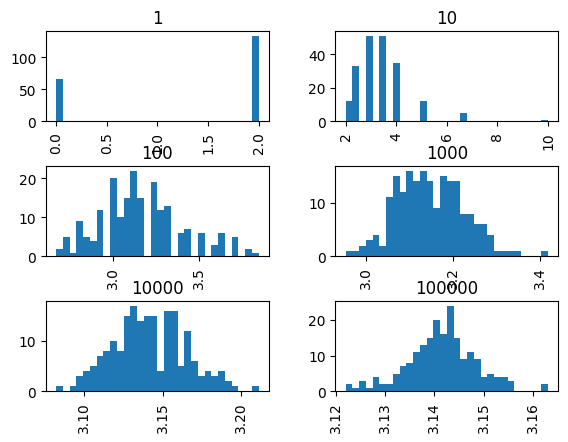

In [140]:
df['pi'][df['needl']].hist(by=df['number_of_drops'], bins=30)

<Axes: xlabel='number_of_drops', ylabel='pi'>

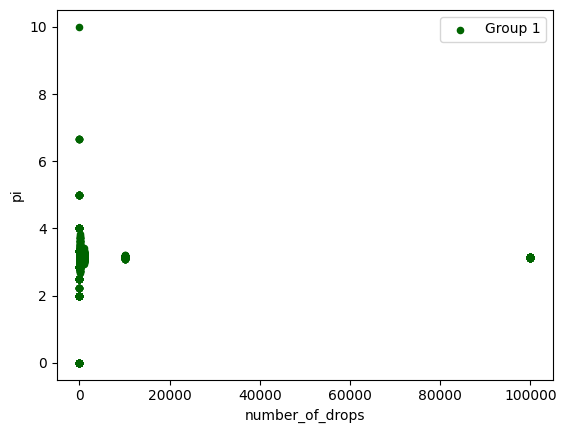

In [141]:
df.plot.scatter(x="number_of_drops", y="pi", color="DarkGreen", label="Group 1")

pi    Axes(0.125,0.11;0.775x0.77)
dtype: object

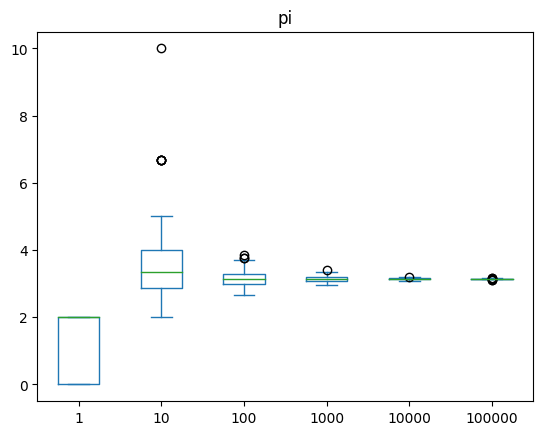

In [142]:
df.plot.box(by="number_of_drops", column=["pi"], grid=False)

In [143]:
# drop1_buttom = driver.find_element(By.ID, "buffonDrop1")
# drop1_buttom.click()